<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Interactive Catalog Visualization</b> <br>
Contact author(s): Leanne Guy <br>
Last verified to run: 2022-09-29 <br>
LSST Science Piplines version: Weekly 2022_40 <br>
Container Size: large <br>
Targeted learning level: intermediate <br>

**Description:** Interactive catalog data visualizations with three open-source python libraries.

**Skills:** Create linked interactive plots for large datasets. Use Bokeh, HoloViews, and Datashader.

**LSST Data Products:** Object catalog.

**Packages:** bokeh, holoviews

**Credit:**
This tutorial was inspired by a notebook originally developed by Keith Bechtol in the context of the LSST Stack Club. 
It has been updated and extended for DP0.1 and DP0.2 by Leanne Guy. 

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0-2.lsst.io">dp0-2.lsst.io</a>. 
Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the 
Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

The Rubin Science Platform was designed to enable scientific analysis of the LSST data sets, which will be unprecedentedly large and complex. 
The software and techniques that are best suited for visualizing large data sets might be new to many astronomers.
This notebook introduces learners with some knowledge of python to three open-source Python libraries that enable powerful interactive visualization of catalogs.
 1. [**HoloViews**](http://holoviews.org): Produce high-quality interactive visualizations easily by annotating plots and images rather than using direct calls to a plotting library
 2. [**Bokeh**](https://bokeh.org): A powerful data visualization library that provides interactive tools including brushing and linking between multiple plots.
 3. [**Datashader**](https://datashader.org): Accurately render very large datasets quickly and flexibly.

These packages are part of the [Holoviz](http://holoviz.org/) ecosystem of tools intended for visualization in a web browser and can be used to create quite sophisticated dashboard-like interactive displays and widgets. The goal of this tutorial is to provide an introduction and starting point from which to create more advanced, custom interactive visualizations. Holoviz has a [vibrant and active community](https://discourse.holoviz.org/) where you can ask questions and discuss vizualizations with a global community. 

> **Notice:** If the notebook or any interactive features seem to stall, first try going a few cells back and rerunning them in order (the order in which cells are run is imporant for this notebook's functionality). If that does not work, try restarting the kernel. If issues persist, try logging out and restarting the Notebook aspect using a "large" instance of the JupyterLab environment.

> **Warning:** It is not recommended to "Restart Kernel and Run All Cells" in this notebook. Some of the examples require interaction (e.g., for the user to select points on a graph) in order to run correctly.

### 1.1. Package imports

In [1]:
# General
import numpy as np
import pandas as pd
import warnings
from astropy.units import UnitsWarning

# Astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.units.quantity import Quantity

# LSST
from lsst.rsp import get_tap_service

# Bokeh
import bokeh
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, HoverTool
from bokeh.models import CDSView, GroupFilter
from bokeh.plotting import figure, gridplot
from bokeh.transform import factor_cmap

# HoloViews
import holoviews as hv
from holoviews import streams, opts
from holoviews.operation.datashader import datashade, dynspread
from holoviews.plotting.util import process_cmap

# Datashader
import datashader as dsh

Show which versions of Bokeh, HoloViews, and Datashader are we working with.
This is important when referring to online documentation as APIs can change between versions.

In [2]:
print("Bokeh version: " + bokeh.__version__)
print("Holoviews version: " + hv.__version__)
print("Datashader version: " + dsh.__version__)

Bokeh version: 2.4.3
Holoviews version: 1.14.9
Datashader version: 0.14.0


### 1.1. Define functions and parameters

Ignore units warnings, and update the maximum number of display rows for Pandas tables.

In [3]:
warnings.simplefilter("ignore", category=UnitsWarning)

pd.set_option('display.max_rows', 5)

Set the HoloViews plotting library to be bokeh. 
You will see the HoloViews and Bokeh icons displayed when the library is loaded successfully.

Set to display output -- Bokeh plots -- inline in the notebook.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
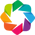

Loading BokehJS ...

In [4]:
hv.extension('bokeh')

output_notebook()

## 2. Use the TAP service to obtain table data

The basis for any data visualization is the underlying data. In this tutorial we will work with tabular data.

We will execute a cone search about a defined coordinate with a specified radius using the Rubin TAP service.
For more details about using the TAP service and ADQL queries, please refer to the TAP queries notebook.

Get a Rubin TAP service instance.

In [5]:
service = get_tap_service()
assert service is not None

Define a reference position on the sky and a radius in degrees for a cone search

In [6]:
coord = SkyCoord(ra=55.65*u.degree, dec=-40.*u.degree, frame='icrs')
radius = 1 * u.deg

Define the query pass to the TAP service.

In [7]:
query = "SELECT coord_ra, coord_dec, objectId, r_extendedness, "\
        "scisql_nanojanskyToAbMag(g_cModelFlux) AS mag_g_cModel, "\
        "scisql_nanojanskyToAbMag(r_cModelFlux) AS mag_r_cModel, "\
        "scisql_nanojanskyToAbMag(i_cModelFlux) AS mag_i_cModel "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec),"\
        "CIRCLE('ICRS', " + str(coord.ra.value) + ", " + str(coord.dec.value) + ", " \
        + str(radius.to(u.deg).value) + " )) = 1 " \
        "AND detect_isPrimary = 1 "\
        "AND scisql_nanojanskyToAbMag(r_cModelFlux) < 27.0 "\
        "AND r_extendedness IS NOT NULL"

In [8]:
print(query)

SELECT coord_ra, coord_dec, objectId, r_extendedness, scisql_nanojanskyToAbMag(g_cModelFlux) AS mag_g_cModel, scisql_nanojanskyToAbMag(r_cModelFlux) AS mag_r_cModel, scisql_nanojanskyToAbMag(i_cModelFlux) AS mag_i_cModel FROM dp02_dc2_catalogs.Object WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec),CIRCLE('ICRS', 55.65, -40.0, 1.0 )) = 1 AND detect_isPrimary = 1 AND scisql_nanojanskyToAbMag(r_cModelFlux) < 27.0 AND r_extendedness IS NOT NULL


This query will return a very large dataset, so we will use an asynchronous query. This will take a few minutes.

In [9]:
job = service.submit_job(query)

In [10]:
job.run()

In [11]:
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

Job phase is COMPLETED


After the job phase has completed, fetch the results into a Pandas table.

In [12]:
%%time
data = job.fetch_result().to_table().to_pandas()

CPU times: user 33.1 s, sys: 800 ms, total: 33.9 s
Wall time: 43.3 s


In [13]:
print(len(data))

1345701


In [14]:
assert len(data) == 1345701

Compute three colors from the apparent magnitudes.

In [15]:
data['gmi'] = data['mag_g_cModel'] - data['mag_i_cModel']
data['rmi'] = data['mag_r_cModel'] - data['mag_i_cModel']
data['gmr'] = data['mag_g_cModel'] - data['mag_r_cModel']

Use the r-band extendedness parameter to classify objects as having a "shape_type" of "point" or "extended".

In [16]:
data['shape_type'] = data['r_extendedness'].map({0: 'point', 1: 'extended'})

In [17]:
# tx1 = np.where(data['shape_type'] == 'point')[0]
# tx2 = np.where(data['shape_type'] == 'extended')[0]
# print(len(tx1), len(tx2))
# del tx1, tx2

In [18]:
assert data[data["shape_type"] == "point"].shape[0] == 232835
assert data[data["shape_type"] == "extended"].shape[0] == 1112866

## 3. HoloViews

[HoloViews](https://holoviews.org) supports easy analysis and visualization by annotating data rather than utilizing direct calls to plotting packages. For this tutorial, we will use [Bokeh](hrrps://bokeh.org) as the plotting library backend for HoloViews. HoloViews supports several plotting libraries and there is an exercise to the user at the end of this section to explore using Holoviews with other plotting packages. 

Create a 2% random subsample of this dataset with which to demonstrate some basic HoloViews functionality.

In [19]:
frac = 0.02
data20K = data.sample(frac=frac, axis='index')
assert len(data20K) == round(frac * len(data))

In [20]:
print(len(data20K))

26914


### 3.1. Single plots

The basic core primitives of HoloViews are [Elements](http://holoviews.org/Reference_Manual/holoviews.element.html) (`hv.Element`). Elements are simple wrappers around your data that provide a semantically meaningful visual representation. An Element may be a set of Points, an Image, a Curve, a Histogram, etc. See the HoloViews [Reference Gallery](http://holoviews.org/reference/index.html) for all the various types of Elements that can be created with HoloViews. 

In this first example we will use the HoloViews [Scatter Element](http://holoviews.org/reference/elements/bokeh/Scatter.html) to quickly visualize the catalog data as a scatter plot. HoloViews maintains a strict separation between content and presentation. This separation is achieved by maintaining sets of keyword values as `options` that specify how `Elements` are to appear.  In this first example we will apply the default options and remove the toolbar.

Make a simple scatter plot of the data using the Scatter element.

In [21]:
hv.Scatter(data20K).options(toolbar=None)

:Scatter   [coord_ra]   (coord_dec,objectId,r_extendedness,mag_g_cModel,mag_r_cModel,mag_i_cModel,gmi,rmi,gmr,shape_type)

The `data20K` set contains many columns. If no columns are specified, explicitly the first 2 columns are taken for x and y respectively by the [Scatter Element](https://holoviews.org/reference/elements/bokeh/Scatter.html).

Now let's bin the data in RA using the robust [Freedman Diaconis Estimator](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges) and plot
the resulting distribution using the Holoviews [Histogram Element](http://holoviews.org/reference/elements/bokeh/Histogram.html). 
We will also add in some basic plot options. Read more about about [customizing plots](https://holoviews.org/user_guide/Customizing_Plots.html) via `options`. Note that `options` can be shortened to `opts`.

In [22]:
(ra_bin, count) = np.histogram(data20K['coord_ra'], bins='fd')
ra_distribution = hv.Histogram((ra_bin, count)).opts(
    title="RA distribution", color='darkmagenta',
    xlabel='RA', fontscale=1.2,
    height=400, width=400)

In [23]:
ra_distribution

:Histogram   [x]   (Frequency)

### 3.2. Layouts of unlinked plots

Next, let's create a layout of several plots. A `Layout` is a type of `Container` that can contain any HoloViews object. Other types of Containers that exist include `Overlay`, `Gridspace`, `Dynamicmap`, etc. See the HoloViews [Reference Gallery](http://holoviews.org/reference/index.html) for the full list of `Layouts` that can be created with HoloViews. See [Building Composite Objects](http://holoviews.org/user_guide/Building_Composite_Objects.html) for the full details about the ways Containers can be composed.

Slice the data and set some more options, and then construct a layout using the `+` operator.

In [24]:
skyplot = hv.Scatter(data20K[["coord_ra", "coord_dec"]]).opts(
    title="Skyplot", toolbar='above', tools=['hover'],
    height=350, width=350, alpha=0.2, size=2)

skyplots = skyplot + ra_distribution.options(height=350, width=350)

In [25]:
skyplots

:Layout
   .Scatter.I   :Scatter   [coord_ra]   (coord_dec)
   .Histogram.I :Histogram   [x]   (Frequency)

Note that these two plots above are not linked, they are two independent plots layed out next to each other. Try zooming in on the skyplot, you will notice that the data are not rebinned in the RA Distribution plot.  We will see how to link plots in Section 3. The tools however do apply to both plots. Try modifying both plots and then use the "reset" tool (the circular arrow symbol). Notice that both plots are reset to their original states. 

### 3.3. Layouts of linked plots

Next, let's setup some default plot options to avoid duplicating long lists everytime we want to make a plot. As different plotting packages typically provide different customization capabilities, we will define one set of options for a Bokeh backend and one for a matplotlib backend.

Set Bokeh customizations as a python dictionary.

In [26]:
plot_style_bkh = dict(alpha=0.5, color='darkmagenta',
                      marker='triangle', size=3,
                      xticks=5, yticks=5,
                      height=400, width=400,
                      toolbar='above')

Set matplotlib customizations.

In [27]:
plot_style_mpl = dict(alpha=0.2, color='c', marker='s',
                      fig_size=200, s=2,
                      fontsize=14, xticks=8, yticks=8)

Instead of subsetting a dataset to choose which columns to plot, HoloViews allows us to specifiy the dimensionality directly. 
`kdims` are the key dimensions or the independent variable(s) and `vdims` are the value dimensions or the dependenent variable(s). 

Choose to use the Bokeh plot style.

In [28]:
plot_style = plot_style_bkh

In [29]:
hv.Scatter(data20K,
           kdims=['gmi'], vdims=['mag_g_cModel']
           ).opts(invert_yaxis=True,
                  xlabel=" (g-i)", ylabel="g",
                  **plot_style)

:Scatter   [gmi]   (mag_g_cModel)

The dimensions have be specified as strings above, but they are in fact rich objects. Dimension objects support a long descriptive label, which complements the short programmer-friendly name.

Let's look at color-color diagram of the point-like sources in the dataset, and also display the distribution of samples along both value dimensions using the `hist()` method of the [Scatter Element](http://holoviews.org/reference/elements/bokeh/Scatter.html).

Set the axes as rich objects.

In [30]:
rmi = hv.Dimension('rmi', label='(r-i)', range=(-0.8, 3.0))
gmr = hv.Dimension('gmr', label='(g-r)', range=(-0.8, 3.0))

Identify the point-like objects as "points" and create the scatter plot.

In [31]:
points = data20K[data20K["shape_type"] == 'point']
col_col = hv.Scatter(points, kdims=gmr,
                     vdims=rmi).opts(**plot_style)

Use the hist method to show the distribution of samples along both value dimensions.

In [32]:
col_col = col_col.hist(dimension=[gmr, rmi],
                       num_bins=100, adjoin=True)

In [33]:
col_col

:AdjointLayout
   :Scatter   [gmr]   (rmi)
   :Histogram   [rmi]   (rmi_count)
   :Histogram   [gmr]   (gmr_count)

Try zooming in on regions of the plot. The histograms are automatically recomputed.  

### 3.4. Magics

The techniques to apply customizations in the cells above use standard Python syntax and are the recommended way to customize your visualizations in HoloViews. HoloViews also supports IPython magic commands. Magics are a much older approach that is not standard Python and is specific to notebooks. [HoloViews notebook magic](https://holoviews.org/user_guide/Notebook_Magics.html) supports both line and cell magics. Here is an example of using magics to plot the same spatial distribution of Objects as above.

In [ ]:
%%opts Scatter [tools=['hover'], toolbar='above',height=400, width=400](color='grey')
hv.Scatter(data20K).opts(alpha=0.3, size=3)

Our result set above contained a lot of columns for the hover tool to display. Often we want to be selective about which information we show in the hover tool and customize the names. We do this by creating a custom hover tool. 

In [ ]:
raDecHover = HoverTool(
    tooltips=[
        ('ra,dec', '@coord_ra / @coord_dec'),
        ('rmag', '@mag_r_cModel'),
        ('type', '@shape_type'),
    ],
    formatters={
        'ra/dec': 'printf',
        'rmag': 'numeral',
        'type': 'printf',
    },
    point_policy="follow_mouse"
)

In [ ]:
hv.Scatter(data20K).opts(tools=[raDecHover], **plot_style_bkh)

It might be necessary to zoom in until points are distinguishable in order to notice how the hover tool box contents list only three properties per point.

## 4. Bokeh

A very useful feature of Bokeh is the ability to add connected interactivity between plots that show different attributes of the same data: this is called **linking**. With linked plots, we can carry out data **brushing**, whereby we select and maniplulate data synchronously across multiple linked plots. For example, if we link a skyplot with a colour-magnitude diagram of the same dataset, we can interactively explore the relationship between the positions of objects in each plot.  

We will now look at the Bokeh plotting library directly to demonstrate how to set up brushing and linking between two panels showing different repsentations of the same dataset. A selection applied to either panel will highlight the selected points in the other panel.

This section is based on [Bokeh linked brushing](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/linking.html#linked-brushing).

### 4.1. Data preparation
The basis for any data visualization is the underlying data. Getting the data preparation phase right is key to creating powerful visualizations. 
Bokeh works with a ColumnDataSource (CDS).  A CDS is essentially a collection of sequences of data that have their own unique column name. We will create a CDS from the data returned by the query above and pass it directly to Bokeh. The CDS is the core of bokeh plots. Bokeh automatically creates a CDS from data passed as python lists or numpy arrays.  CDS are useful as they allow data to be shared between multiple plots and renderers, enabling brushing and linking.

Create a column data source for the plots to share. The data defined as x0,y0 and x1,y1 will be used to plot the left and right plots, respectively.

In [ ]:
col_data = dict(x0=data20K['coord_ra'] - coord.ra.value,
                y0=data20K['coord_dec'] - coord.dec.value,
                x1=data20K['gmi'],
                y1=data20K['mag_g_cModel'],
                ra=data20K['coord_ra'], dec=data20K['coord_dec'])
source = ColumnDataSource(data=col_data)

Additional data can be added to the CDS after creation.

In [ ]:
source.data['objectId'] = data20K['objectId']
source.data['rmi'] = data20K['rmi']
source.data['gmr'] = data20K['gmr']
source.data['mag_r_cModel'] = data20K['mag_r_cModel']
source.data['shape_type'] = data20K['shape_type']
source.data['r_extendedness'] = data20K['r_extendedness']

Create a "points" view on "shape_type" = point.

In [ ]:
points = CDSView(source=source,
                 filters=[GroupFilter(column_name='shape_type', group="point")])

### 4.2. Linked plots with data brushing

We will use Bokeh to plot a color-magnitude (g vs. g-i) diagram and a plot of the sky coordinates, and then link them.

Create a custom hover tool for each panel.

In [ ]:
hover_left = HoverTool(tooltips=[("ObjectId", "@objectId"),
                                 ("(ra,dec)", "(@coord_ra, @coord_dec)"),
                                 ("type", "@shape_type")
                                 ])
hover_right = HoverTool(tooltips=[("ObjectId", "@objectId"),
                                  ("(g-i,g)", "(@x1, @y1)"),
                                  ("extendedness", "@r_extendedness")
                                  ])
tools = "box_zoom,box_select,lasso_select,reset,help"
tools_left = [hover_left, tools]
tools_right = [hover_right, tools]

Create a new plot and add a renderer. Use the "points" view defined above.

In [ ]:
# Create the left-side plot
left = figure(tools=tools_left,
              plot_width=400, plot_height=400,
              title='Spatial: Centered on (RA, Dec) = (%.2f, %.2f)' %
              (coord.ra.value, coord.dec.value))
left.circle('x0', 'y0', hover_color='firebrick',
            size=3, alpha=0.7,
            source=source,
            view=points)

left.x_range = Range1d(1.5, -1.5)
left.y_range = Range1d(-1.5, 1.5)
left.xaxis.axis_label = 'Delta ra'
left.yaxis.axis_label = 'Delta dec'

# Create the right-side plot create
right = figure(tools=tools_right, plot_width=400, plot_height=400,
               title='CMD')
right.circle('x1', 'y1', hover_color='firebrick',
             size=4, alpha=0.8,
             source=source,
             view=points)

right.x_range = Range1d(-1.5, 2.8)
right.y_range = Range1d(32., 16.)
right.xaxis.axis_label = '(g-i)'
right.yaxis.axis_label = 'g'

Display the grid of plots. This can take a moment to render.

In [ ]:
p = gridplot([[left, right]])
show(p)

Use the hover tool to see information about individual datapoints (e.g., the "ObjectId"). This information should appear automatically as you hover the mouse over the datapoints. Notice the data points highlighted in red on one panel with the hover tool are also highlighted on the other panel.

Next, click on the selection box icon (with a "+" sign) or the selection lasso icon found in the upper right corner of the figure. Use the selection box and selection lasso to make various selections in either panel by clicking and dragging on either panel. The selected data points will be displayed in the other panel.

### 4.3. Linked streams

If we want to do subsequent calculations with the set of selected points, we can use HoloViews linked streams for custom interactivity. The following visualization is a modification of this example. As for the example above, use the selection box and selection lasso to choose datapoints on the left panel. The selected points should appear in the right panel. Finally, notice that as you change the selection on the left panel, the mean x- and y-values for selected datapoints are shown in the title of right panel.

This section is based on [Holoviews Selection1D points](http://holoviews.org/reference/streams/bokeh/Selection1D_points.html).

Declare some points, and define a selection for the stream.

In [ ]:
points = hv.Points((data20K['coord_ra'] - coord.ra.value,
                    data20K['coord_dec'] - coord.dec.value)
                   ).options(tools=['box_select', 'lasso_select'])

selection = streams.Selection1D(source=points)

Define a function that uses the selection indices to slice points and compute statistics. This function is only used in the following cell, for the plot below.

In [ ]:
def selected_info(index) -> str:
    selected = points.iloc[index]
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(selected.array().mean(axis=0))
    else:
        label = 'No selection'
    return selected.relabel(label).options(color='red')

Combine "points" and DynamicMap. Notice the syntax used here, how the "+" sign makes side-by-side panels.

In [ ]:
points + hv.DynamicMap(selected_info, streams=[selection])

In the next cell, we access the indices of the selected datapoints. We could use these indices to select a subset of the full sample for further examination.

In [ ]:
print(len(selection.index))

## 5.0  Datashader

The interactive features of Bokeh work well with datasets up to a few tens of thousands of data points. To efficiently explore larger datasets, we'd like to use another visualization model that offers better scalability, namely Datashader.

In the examples below, notice that as one zooms in on the datashaded two-dimensional histograms, the bin sizes are dynamically adjusted to show finer or coarser granularity in the distribution. This allows one to interactively explore large datasets without having to manually adjust the bin sizes while panning and zooming. Zoom in all the way and you can see individual points (i.e., bins contain either zero or one count). If you zoom in far enough, the individual points are represented by extremely small pixels in datashader that are difficult to see. A solution is to dynspread instead of datashade, which will preserve a finite size of the plotted points.

The next cell also uses the concept of linked Streams in HoloViews for custom interactivity, in this case to create a selection box. We'll use that selection box tool in the following cell.

### 5.1. Plotting thousands of data points

Plot a color-colour diagram using Bokeh with a customized hover tool

In [ ]:
plot_options = {'plot_height': 400, 'plot_width': 800,
                'tools': ['pan', 'box_zoom', 'box_select',
                          'wheel_zoom', 'reset', 'help']}

p = figure(title="Color-Color Diagram",
           x_axis_label="(g-r)", y_axis_label="(r-i)",
           x_range=(-2.0, 3.0), y_range=(-2.0, 3.0),
           **plot_options)
p.circle(x='gmr', y='rmi', source=source,
         size=2, alpha=0.2,
         hover_color='firebrick',
         legend_field="shape_type",
         color=factor_cmap('shape_type', 'Category10_3',
                           ['point', 'extended']))

hover = HoverTool(tooltips=[("objectId", "@objectId"),
                            ("(ra,dec)", "(@coord_ra, @coord_dec)"),
                            ("(g-r,r-i)", "(@gmr, @rmi)"),
                            ("type", "@shape_type")])
p.add_tools(hover)

In [ ]:
show(p)

We see that even with a medium sized dataset of ~20K points, this plot suffers from overplotting.  A classic strategy is to specify transparency of the glyphs so we can better see sparse and dense areas. In the plot above we have `alpha=0.2`. This helps,  but washes out the detail in the sparser regions. An additional problem is that we cannot add too many glyphs to any plot. 

HoloViews + Datashader allow us to plot millions to billions of points to produce much more informative plots. Datashader rasterizes or aggregates datasets into regular grids that can then be further analysed or viewed as plots or images.

Create a holoviews object "points" to hold and plot data.

In [ ]:
points = hv.Points((source.to_df()['gmr'],source.to_df()['rmi']))

Create the linked streams instance.

In [ ]:
boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=points, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

Apply the datashader

In [ ]:
p = dynspread(datashade(points, cmap="Viridis"))
p = p.opts(width=800, height=300, padding=0.05, show_grid=True,
           xlim=(-2.0, 7.0), ylim=(-5.0, 3.0), xlabel="(g-r)", ylabel="(r-i)",
           tools=['box_select', 'lasso_select'])

Render the datashaded plot.

In [ ]:
p * bounds

This `datashade` plot of the same color-color diagram as above does not require any magic-number parameters such as size and alpha and automatically ensures that there is no saturation or overplotting.  Select the `wheel zoom` and adjust the image as you interact with the plot. Note how the shades of color of the data points change according to the local density.

### 5.2. Plotting millions of data points

In fact, this dataset is really too small to use datashader on. Let's see how to visualize the full >1 million object dataset returned by the query with datashader.

Create a Points Element for the data.

In [ ]:
points = hv.Points((data['gmr'], data['rmi']))

Create the linked streams instance.

In [ ]:
boundsxy = (0, 0, 0, 0)
box = streams.BoundsXY(source=points, bounds=boundsxy)
bounds = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

Apply the datashader.

In [ ]:
p = dynspread(datashade(points, cmap="Viridis"))
p = p.opts(width=800, height=300, padding=0.05, show_grid=True,
           xlim=(-2.0, 7.0), ylim=(-5.0, 3.0), xlabel="(g-r)", ylabel="(r-i)",
           tools=['box_select', 'lasso_select'])

Render the datashaded plot.

In [ ]:
%%time
p * bounds

### 5.3. Adding a callback function

Next we will add callback functionality to the color-color diagam above to retrieve the indices of selected points. We use the box selection tool to create a selection box for a two-dimensional histogram and then count the number of datapoints within the selection region.

> **STOP** - Select some data points from the plot above using the box select tool before proceeding

In [ ]:
selection = (points.data.x > box.bounds[0]) \
    & (points.data.y > box.bounds[1]) \
    & (points.data.x < box.bounds[2]) \
    & (points.data.y < box.bounds[3])
print('The selection box contains %i datapoints'%(np.sum(selection)))

### 5.4. Interactive selection

Now we will plot a spatial distribution on the sky of all the data (in the left-hand plot below), and link it to a two-dimensional histogram of the data (right-hand plot below). Use a box selection in the spatial distribution to change which data are included in the histogram.

First, create a holoviews dataset instance, and label some of the columns.

In [ ]:
kdims = [('coord_ra', 'RA(deg)'), ('coord_dec', 'dec(deg)')]
vdims = [('mag_r_cModel', 'r(mag)')]
ds = hv.Dataset(data, kdims, vdims)

In [ ]:
points = hv.Points(ds)
boundsxy = (np.min(ds.data['coord_ra']), np.min(ds.data['coord_dec']),
            np.max(ds.data['coord_ra']), np.max(ds.data['coord_dec']))
box = streams.BoundsXY(source=points, bounds=boundsxy)
box_plot = hv.DynamicMap(lambda bounds: hv.Bounds(bounds), streams=[box])

Create custom callback functionality to update the linked histogram

In [ ]:
def log_inf(x) -> float:
    return np.log(x) if x > 0 else 0


def update_histogram(bounds=bounds) -> hv.Histogram:
    selection = (ds.data['coord_ra'] > bounds[0]) & \
                (ds.data['coord_dec'] > bounds[1]) & \
                (ds.data['coord_ra'] < bounds[2]) & \
                (ds.data['coord_dec'] < bounds[3])
    selected_mag = ds.data.loc[selection]['mag_r_cModel']
    frequencies, edges = np.histogram(selected_mag)
    hist = hv.Histogram(
        (list(map(log_inf, frequencies)), edges)).opts(xlabel='r (mag)')
    return hist

In [ ]:
dmap = hv.DynamicMap(
    update_histogram, streams=[box]).options(height=400, width=400)
datashade(points, cmap=process_cmap("Viridis", provider="bokeh")) * \
    box_plot.options(height=400, width=400, tools=['box_select', 'lasso_select']) + \
    dmap

Try changing the box selection and watch as the histogram is recomputed and displayed. 

Finally, delete the job

In [ ]:
job.delete()

## 6. Exercises for the learner

 1. Holoviews works with a wide range of plotting libraries, Bokeh, matplotlib, plotly, mpld3, pygal to name a few. As an exercise, try changing the Holoviews plotting library to be `matplotlib` instead of `bokeh` at the beginning of the notebook with `hv.extension('matplotlib')`. You will see the holoviews + matplotlib icons displayed when the library is loaded successfully. Recreate a few plots and compare the outputs. Try again with some other plotting library. Don't forget to set the plotting library back to whichever you prefer to use for the rest of this tutorial. Note that some warnings might be raised.
  
 2. Try writing a different callback function to use in Section 5.3. 